In [1]:
# import the necessary library 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from numpy import *

In [2]:
training_file = "../data/original/train.csv"
test_file = "../data/original/test.csv" 
train_data = pd.read_csv(training_file)
test_data = pd.read_csv(test_file)

# Data Description
VARIABLE DESCRIPTIONS: <br>
survival        Survival  <br>
                (0 = No; 1 = Yes) <br>
pclass          Passenger Class  <br>
                (1 = 1st; 2 = 2nd; 3 = 3rd) <br>
name            Name   <br>
sex             Sex    <br>
age             Age    <br>
sibsp           Number of Siblings/Spouses Aboard   <br>
parch           Number of Parents/Children Aboard   <br>
ticket          Ticket Number                       <br>
fare            Passenger Fare                      <br>
cabin           Cabin                               <br>
embarked        Port of Embarkation                 <br>
                (C = Cherbourg; Q = Queenstown; S = Southampton) <br>

SPECIAL NOTES:   <br>
Pclass is a proxy for socio-economic status (SES) <br>
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower    <br>

Age is in Years; Fractional if Age less than One (1) <br>
 If the Age is Estimated, it is in the form xx.5 <br>

With respect to the family relation variables (i.e. sibsp and parch) <br>
some relations were ignored.  The following are the definitions used <br>
for sibsp and parch.      <br>

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic <br>
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored) <br>
Parent:   Mother or Father of Passenger Aboard Titanic <br>
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic <br>

Other family relatives excluded from this study include cousins, <br>
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled <br>
only with a nanny, therefore parch=0 for them.  As well, some <br>
travelled with very close friends or neighbors in a village, however, <br>
the definitions do not support such relations.  <br>

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.info()
print ("-"*30)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fa

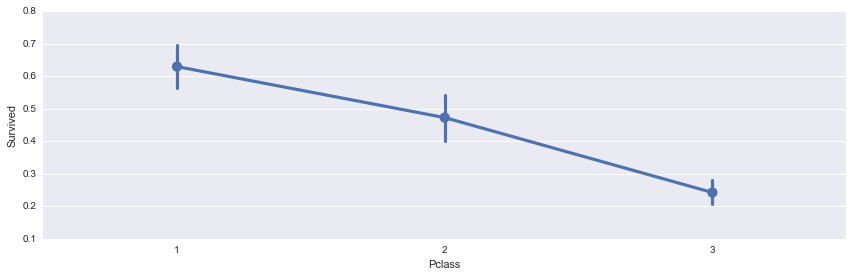

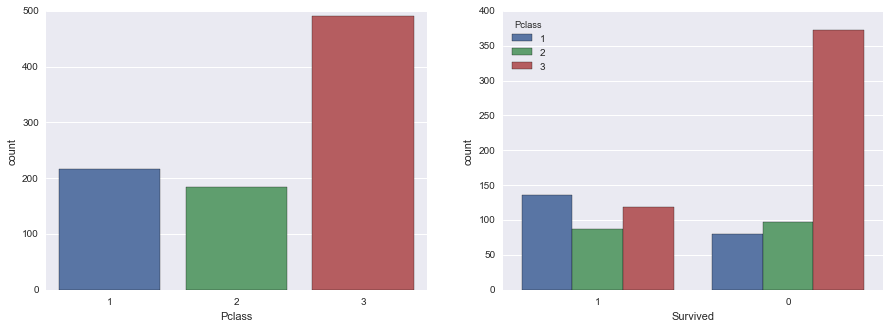

In [6]:
# Let's start from Pclass
sns.factorplot("Pclass","Survived",  data = train_data, size = 4, aspect = 3)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Pclass', data=train_data, ax=axis1)
sns.countplot(x='Survived', hue="Pclass", data=train_data, order=[1,0], ax=axis2)

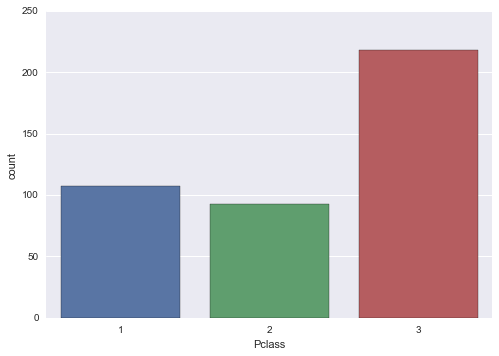

In [7]:
# Let's look at the test data regarding with Pclass
sns.countplot(x = "Pclass", data = test_data)

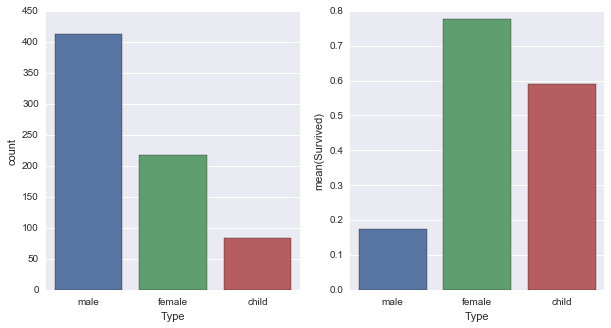

In [8]:
# Let's look at Sex 
def get_type(passenger):
    sex, age = passenger
    return 'child' if not isnan(age) and age < 16 else sex
train_data["Type"] = train_data[["Sex", "Age"]].apply(get_type, axis = 1)
test_data["Type"] = test_data[["Sex", "Age"]].apply(get_type, axis = 1)

train_non = train_data[train_data["Age"].notnull()]
train_miss = train_data[train_data["Age"].isnull()]

test_non = test_data[test_data["Age"].notnull()]
test_miss = test_data[test_data["Age"].isnull()]

# plot data with non-missing Age 
fig, (axis1, axis2) = plt.subplots(1, 2, figsize =  (10,5))
sns.countplot(x = "Type", data = train_non, ax = axis1)

train_perc = train_non[["Type", "Survived"]].groupby(["Type"], as_index = False).mean()
sns.barplot(x = "Type", y = "Survived", data = train_perc, ax = axis2, order = ["male", "female", "child"])

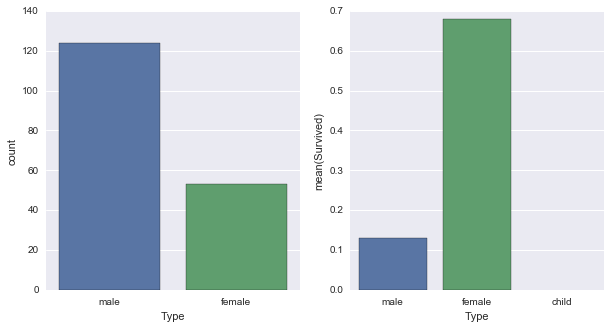

In [9]:
# plot data with non-missing Age 
fig, (axis1, axis2) = plt.subplots(1, 2, figsize =  (10,5))
sns.countplot(x = "Type", data = train_miss, ax = axis1)

train_perc = train_miss[["Type", "Survived"]].groupby(["Type"], as_index = False).mean()
sns.barplot(x = "Type", y = "Survived", data = train_perc, ax = axis2, order = ["male", "female", "child"])

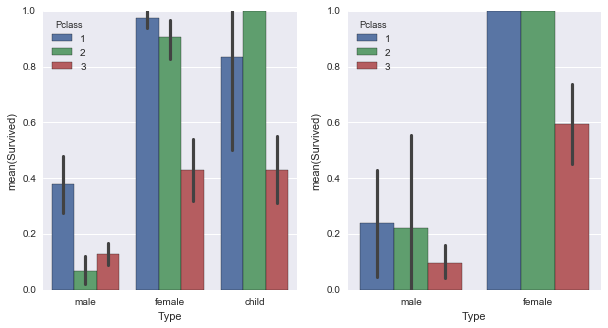

In [10]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (10, 5))
sns.barplot(x = "Type", y = "Survived", hue = "Pclass", data = train_non, ax = axis1)
sns.barplot(x = "Type", y = "Survived", hue = "Pclass", data = train_miss, ax = axis2)

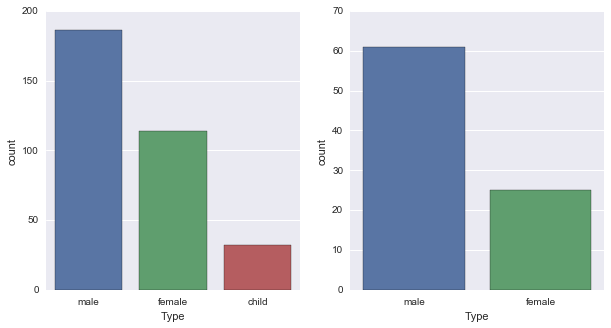

In [11]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(x = "Type", data = test_non, ax = axis1)
sns.countplot(x = "Type", data = test_miss, ax = axis2)

Since there are 277 missing data for **age** in training dataset and 86 for **age** in test dataset, those samples with missing data is not counted towards the above plots.

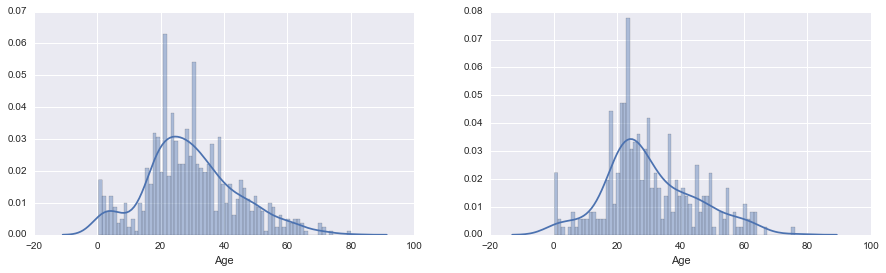

In [12]:
# Now let's explore age
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))
sns.distplot(train_non["Age"],bins = 70, ax = axis1)
sns.distplot(test_non["Age"],bins = 70, ax = axis2)

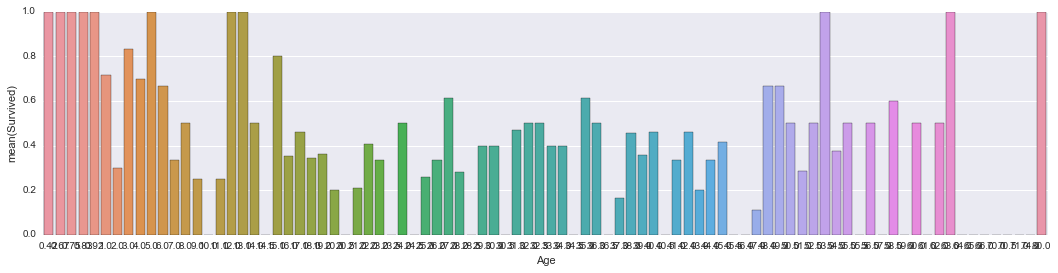

In [13]:
# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = train_non[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age, ax = axis1)

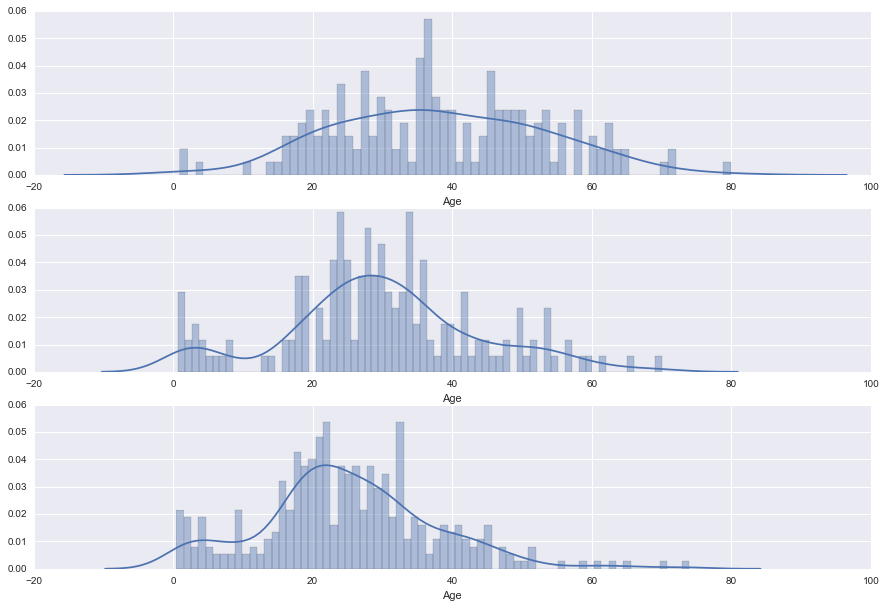

In [14]:
fig, (axis1, axis2, axis3) = plt.subplots(3, 1, figsize=(15, 10))
sns.distplot(train_non[train_non["Pclass"] == 1]["Age"],bins = 70, ax = axis1)
sns.distplot(train_non[train_non["Pclass"] == 2]["Age"],bins = 70, ax = axis2)
sns.distplot(train_non[train_non["Pclass"] == 3]["Age"],bins = 70, ax = axis3)

In [15]:
# let's explore Embarked for training data
train_data["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [16]:
# test data
test_data["Embarked"].describe()

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object

In [17]:
train_data["Embarked"] = train_data["Embarked"].fillna("S")

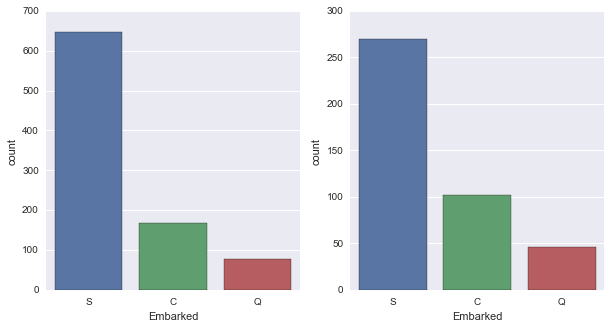

In [18]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (10, 5))
sns.countplot(x = "Embarked", data = train_data, ax = axis1, order = ["S", "C", "Q"])
sns.countplot(x = "Embarked", data = test_data, ax = axis2, order = ["S", "C", "Q"])

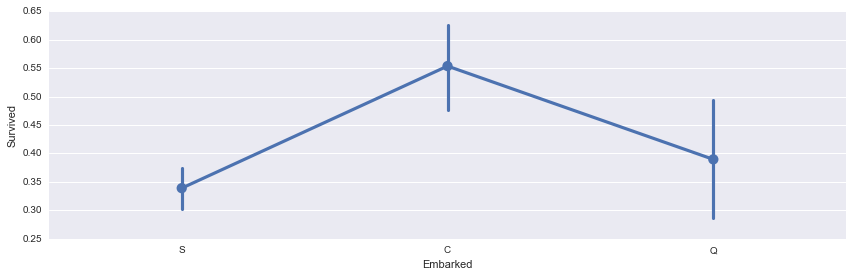

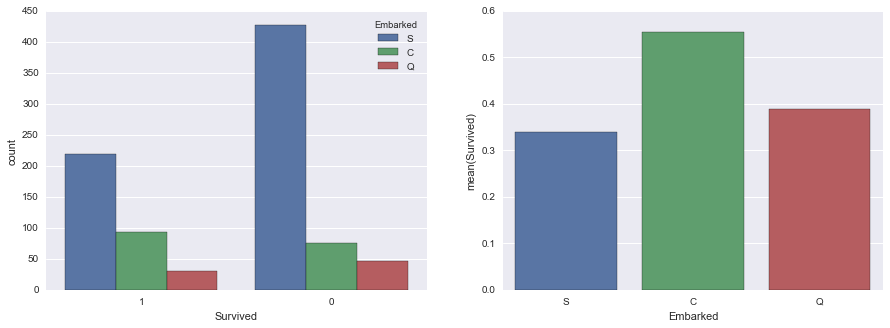

In [19]:
sns.factorplot("Embarked", "Survived", data = train_data, size = 4, aspect = 3)
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x = "Survived", hue = "Embarked", data=train_data, order=[1,0], ax = axis1)

embarked_perc = train_data[["Survived", "Embarked"]].groupby(["Embarked"], as_index = False).mean()
sns.barplot(x = "Embarked", y = "Survived", data = embarked_perc, order = ["S","C", "Q"], ax = axis2)

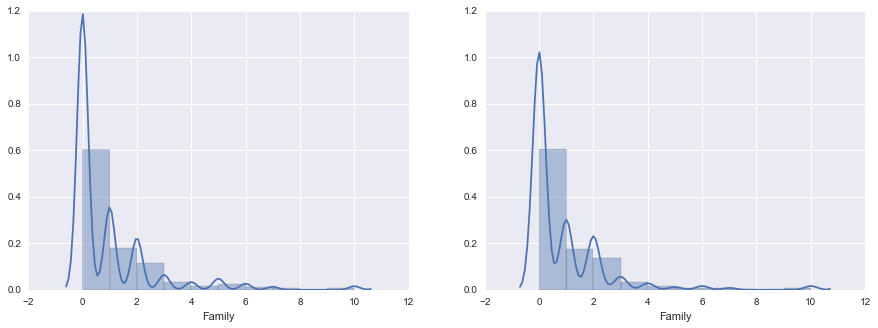

In [20]:
# now check the family size
train_data["Family"] = train_data["Parch"] + train_data["SibSp"]
test_data["Family"] = test_data["Parch"] + test_data["SibSp"]
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(train_data["Family"], bins = 10, ax = axis1)
sns.distplot(test_data["Family"], bins = 10, ax = axis2)

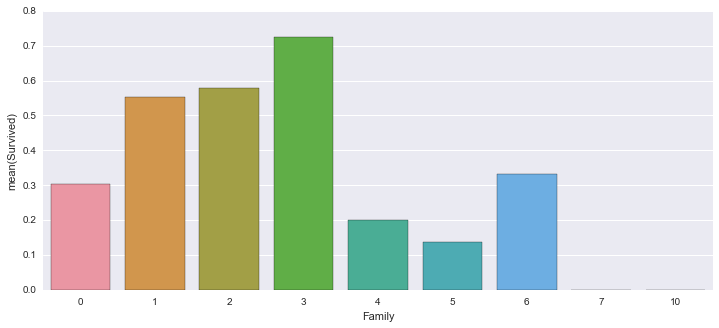

In [21]:
fig, axis1 = plt.subplots(1, 1, figsize=(12, 5))
family_spec = train_data[["Survived", "Family"]].groupby(["Family"], as_index=False).mean()
sns.barplot(x = "Family", y = "Survived", data = family_spec, ax = axis1)

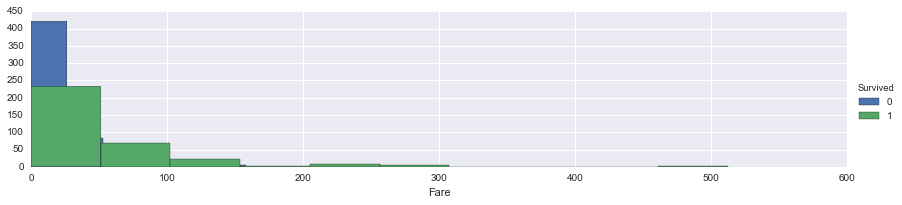

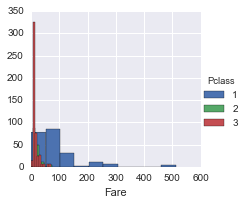

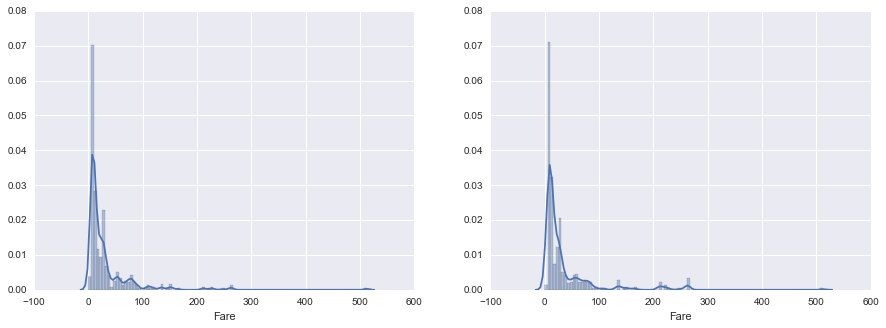

In [22]:
# Explore the fare
facet = sns.FacetGrid(train_data, hue="Survived", aspect=4)
facet.map(plt.hist, "Fare")
facet.add_legend()

facet = sns.FacetGrid(train_data, hue="Pclass")
facet.map(plt.hist, "Fare")
facet.add_legend()

test_data["Fare"].fillna(test_data["Fare"].median(), inplace = True)
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(train_data["Fare"], bins=100, ax=axis1)
sns.distplot(test_data["Fare"], bins=100, ax=axis2)

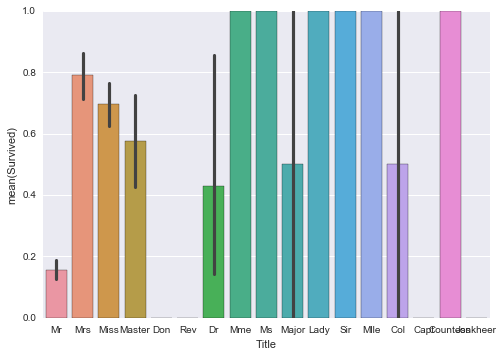

In [23]:
import re

# A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

titles = train_data["Name"].apply(get_title)
train_data["Title"] = titles
sns.barplot(x = "Title", y = "Survived", data=train_data)

In [24]:
from collections import Counter
family_name = train_data["Name"].apply(lambda x: x.split(",")[0])
family_name.describe()

count           891
unique          667
top       Andersson
freq              9
Name: Name, dtype: object

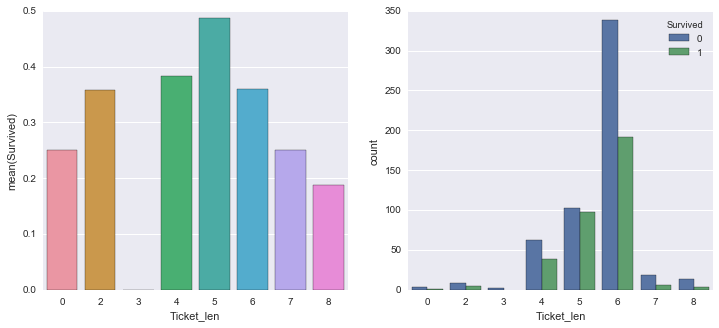

In [25]:
import re 
def ticket_number(ticket):
    ticket_search = re.search('[a-zA-Z]+', ticket)
    if ticket_search:
        ticket_number = re.search(' [0-9]+', ticket)
        if ticket_number:
            return len(ticket_number.group(0))
        return 0
    return len(ticket)

ticket_len = train_data["Ticket"].apply(ticket_number)
train_data["Ticket_len"] = ticket_len
fig, (axis1,axis2) = plt.subplots(1, 2, figsize=(12, 5))
family_spec = train_data[["Survived", "Ticket_len"]].groupby(["Ticket_len"], as_index=False).mean()
sns.barplot(x = "Ticket_len", y = "Survived", data = family_spec, ax = axis1)
sns.countplot(x = "Ticket_len", hue = "Survived", data = train_data, ax = axis2)


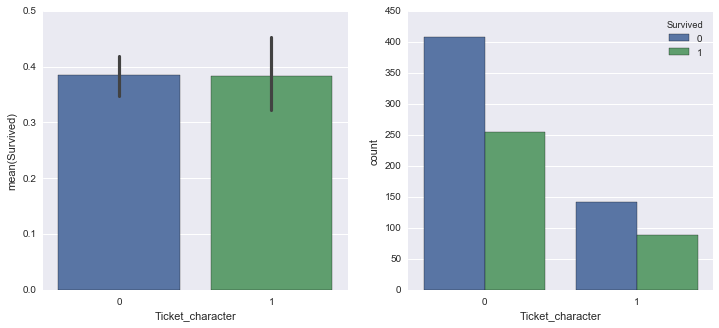

In [26]:
import re
def ticket_character(ticket):
    ticket_search = re.search('[A-Za-z]+', ticket)
    if ticket_search:
        return 1
    return 0
train_data["Ticket_character"] = train_data["Ticket"].apply(ticket_character)
fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (12, 5))
sns.barplot(x = "Ticket_character", y = "Survived", data=train_data, ax = axis1)
sns.countplot(x = "Ticket_character", hue = "Survived", data = train_data, ax = axis2)

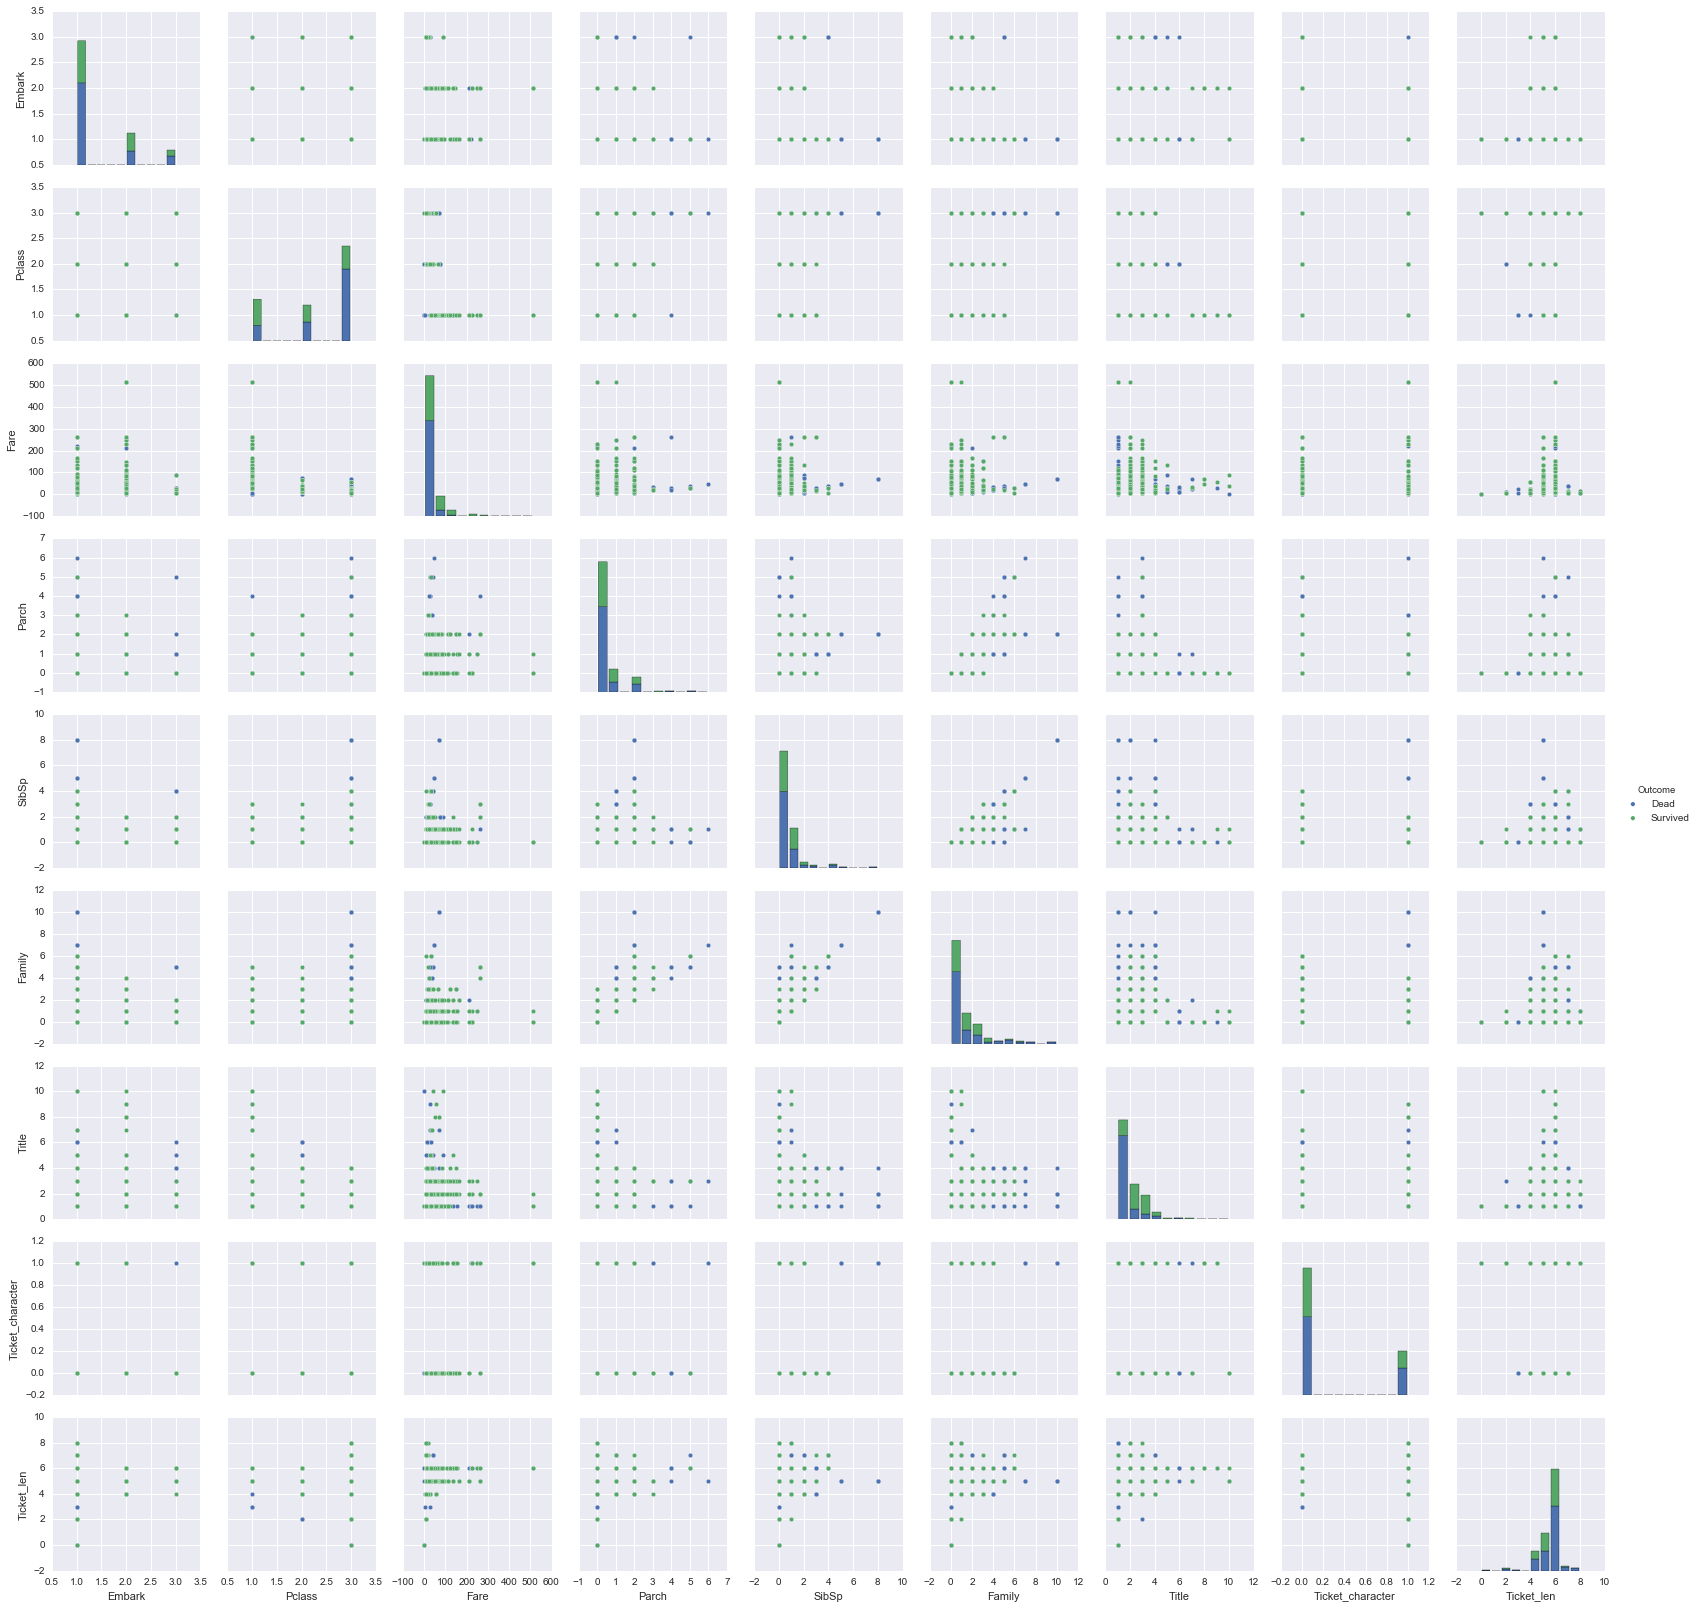

In [27]:
def get_outcome(survived):
    return "Dead" if survived == 0 else "Survived"
def get_embark(embark):
    if embark == "S":
        return 1
    elif embark == "C":
        return 2
    else:
        return 3
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v
train_data["Title"] = titles
train_data["Outcome"] = train_data["Survived"].apply(get_outcome)
train_data["Embark"] = train_data["Embarked"].apply(get_embark)
plt.figure()
sns.pairplot(train_data[["Type","Embark", "Pclass", "Fare","Outcome", "Parch","SibSp","Family", "Title","Ticket_character", "Ticket_len"]], hue = "Outcome", dropna = True)

Feature ranking:
1. feature Type (0.223389)
2. feature Age (0.195763)
3. feature Fare (0.169951)
4. feature Title (0.107714)
5. feature Pclass (0.100797)
6. feature Ticket_len (0.055549)
7. feature Family (0.043164)
8. feature SibSp (0.034496)
9. feature Embark (0.028686)
10. feature Parch (0.023531)
11. feature Ticket_character (0.016960)


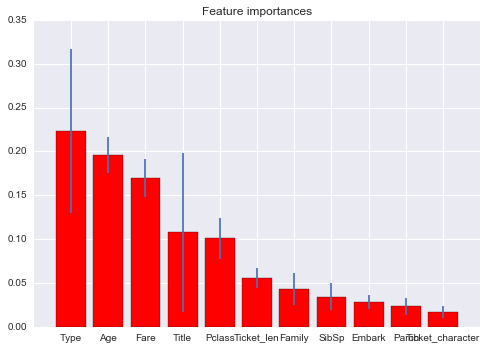

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
forest = ExtraTreesClassifier(n_estimators=300, random_state=0)
def convert_type(types):
    if types == "female":
        return 1
    elif types == "male":
        return 2
    else:
        return 3
train_data["Type"] = train_data["Type"].apply(convert_type)
train_data["Title"].apply(lambda x: int(x))
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())
feature_list = ["Type","Embark", "Pclass", "Fare", "Parch","SibSp","Family", "Title","Ticket_character", "Ticket_len", "Age"]
X = train_data[feature_list]
y = train_data["Survived"]
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
features = []
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_list[indices[f]], importances[indices[f]]))
    features.append(feature_list[indices[f]])
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), features)
plt.xlim([-1, X.shape[1]])
plt.show()